### 1. Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Data

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Explore

In [3]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Survival Rate For Different Class and Gender')

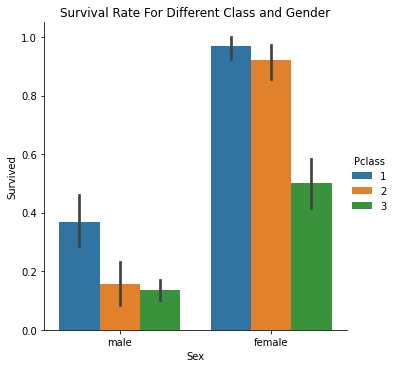

In [5]:
sns.catplot(data=titanic, x='Sex', y='Survived', hue='Pclass', kind='bar')
plt.title('Survival Rate For Different Class and Gender')

<AxesSubplot:xlabel='Fare'>

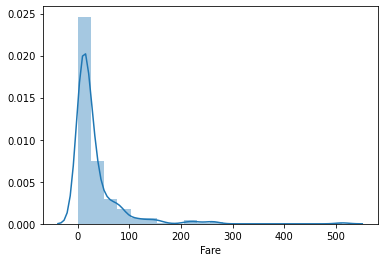

In [6]:
sns.distplot(titanic['Fare'], bins=20)

<AxesSubplot:xlabel='Age'>

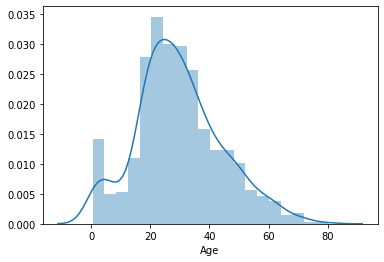

In [7]:
sns.distplot(titanic['Age'], bins=20)

### 4. Preprocessing

4.1) Features/Target Split <br>
4.2) `getDeck( )` <br>
4.3) `pipeline` <br>
4.4) `ColumnTransformer`

#### 4.1 Feature/Traget Split

In [8]:
x = titanic.drop('Survived', axis=1).copy()
Y = titanic['Survived'].copy()
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 4.2 getDeck()

In [9]:
def getDeck(w):
    if w is not np.NaN:
        return(w[0])
    else:
        return('X')

x['Deck'] = x['Cabin'].apply(getDeck)
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,X
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,X
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,X


#### 4.3 Pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


numeric_feature = ['Age']
numeric_transformer = Pipeline(steps = [
    ('si', SimpleImputer(missing_values=np.NaN, strategy='median'))])


categorical_feature = ['Pclass', 'Sex', 'Deck']
categorical_transformer = Pipeline(steps = [
    ('si', SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='X')),
    ('ohe', OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False, dtype=int)) ])

#### 4.4 ColumnTransformer

In [11]:
from sklearn.compose import ColumnTransformer

preprocessor=ColumnTransformer(transformers=[('numeric_transformer', numeric_transformer, numeric_feature),
                                             ('categorical_transformer', categorical_transformer, categorical_feature)],
                              remainder='drop')


#### 4.5 LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression

clf= Pipeline(steps=[
    ('pp', preprocessor),
    ('lr', LogisticRegression(solver='liblinear')) ])

### 5. GridSearchCV

In [13]:
from sklearn.model_selection import  GridSearchCV

param_grid = {'lr__penalty': ['l1','l2']}

gscv = GridSearchCV(estimator = clf,
                   param_grid = param_grid,
                   cv=5,
                   return_train_score = False)

### 6. Fit

In [14]:
gscv.fit(x, Y)

print(gscv.best_estimator_)
print('-'*100)
print(gscv.best_score_)
print('-'*100)
print(gscv.best_params_)
print('-'*100)
print(gscv.cv_results_)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age']),
                                                 ('categorical_transformer',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(fill_value='X',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore',
                                  

### Predict

In [15]:
titanic_test = pd.read_csv('test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
print(titanic.columns)
print(titanic_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
titanic_test['Deck'] = titanic_test['Cabin'].apply(getDeck)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,X
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,X
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,X
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,X
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,X


In [18]:
y_pred = gscv.best_estimator_.predict(titanic_test)

cols = list(titanic_test.columns)
cols.append('Survived')

prediction = pd.concat([titanic_test, pd.DataFrame(y_pred)], axis=1)

prediction.columns = cols

prediction.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,X,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,X,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,X,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,X,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,X,1
